# SKlearn - neural networks

Import the digits data set and train a multilayer perceptron (MLP). The digits dataset, which is a simplified version of the very famous MNIST data set. This is a set of images, in black and white, of hand-drawn numbers from 0 to 9. Before proceeding, we will look at some of the data.

As before, we will be using the sklearn library, which is adequate for small multilayer perceptrons. SKlearn is not intended to be a deep-learning library, and does not support parallelisation via GPUs. This means it is fine for our small examples (<1000 rows, <50 features, 2-3 hidden layers), but becomes very slow for anything larger.

As you go through this notebook, recall from previous weeks the very particular way that sklearn initializes, trains, runs, and evaluates a model. We've provided some example code to get you started.

In [1]:
# import a dataset -  we will use one of the scikit built in datasets again
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()

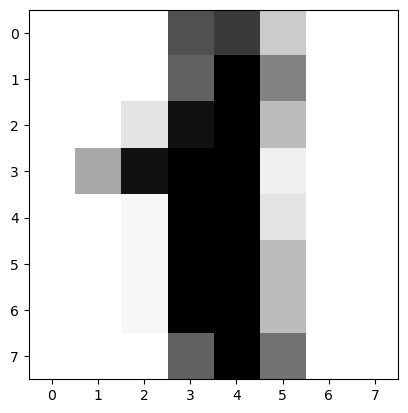

In [2]:
# get one image
image1 = digits.images[1]
plt.imshow(image1, cmap='Greys')

In [3]:
print(image1)

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


You should understand what the cmap parameter is doing here. If you do not, read the documentation for imshow (via a google search). The data in *images* is stored as a 2-d array, so that the rows and columns of the array match up with the physical coordinates of the image. The data in *data* is stored as a 1-d array, as shown below. You should compare both arrays to ensure you understand how the image data has been converted. From here, we will be working with data, as the sklearn functions take a 1-D array as input.

Note that this means, for the simple MLP we will be training here, it does not matter which order the image pixels are placed in the input vector. That's not the case for a CNN where the convolution layer is applied to grids of nearby pixels. Randomly shuffling the pixels in the image prior to training a CNN would harm performance. 

In [4]:
print(digits.images[1])
print(digits.data[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


Now let us train the MLP. As part of good practice, we scale the digits data. The effect of this is to ensure that any resulting gradients are of a similar scale. This will make the gradient descent process more likely to converge quickly.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

X_scaled = preprocessing.scale(digits.data)

# split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, test_size = 0.3)
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(20, 20), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [6]:
clf.score(X_test, y_test)

0.937037037037037

In [7]:
#help(clf)

Note that the above score is providing the accuracy - think about whether this is a good metric for this classifier.

Has the model finished training? (and if not, what should you change?)

Using the code above as a template, experiment with changing some of the free parameters. What happens when you vary the number of hidden layers, neurons, and activation function? (refer to the sklearn documentation if you do not know how to do this). Create appropriate plots to show your results.

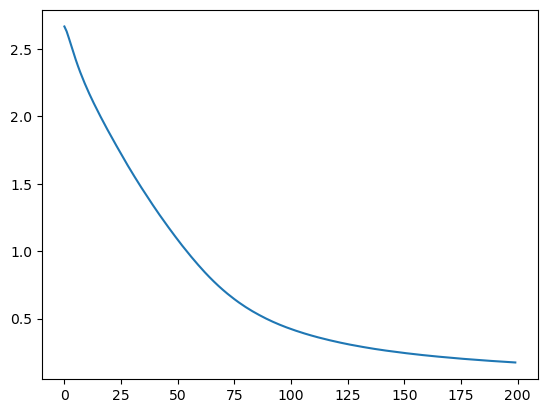

In [8]:
loss = clf.loss_curve_
plt.plot(loss)

In [9]:
from sklearn.model_selection import GridSearchCV # An iterative sklearn function to test a variety of parameters

# Initialise MLP with some key parameters
clf = MLPClassifier(solver='sgd', alpha=1e-5, random_state=1)

# Define parameters to change
parameters = {
    'hidden_layer_sizes':[(10,10),(20,20),(20,30),(30,30),(30,40),(50,50),(80,80), # Change n neurons for 2 layers
                         (10,10,10),(10,20,20),(20,20,20),(20,40,60),(60,80,100)], # Change n neurons for 3 layers
    'activation':['tanh','relu'],
    
}

# Run search function
clf = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_

/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_

/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_

/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_

GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=1e-05, random_state=1, solver='sgd'),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 10), (20, 20), (20, 30),
                                                (30, 30), (30, 40), (50, 50),
                                                (80, 80), (10, 10, 10),
                                                (10, 20, 20), (20, 20, 20),
                                                (20, 40, 60), (60, 80, 100)]})

In [10]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (80, 80)}


In [12]:
import pandas as pd
# Create data frame of results
df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),
                pd.DataFrame(clf.cv_results_["mean_test_score"], 
                             columns=["Accuracy"])],axis=1)
df.sort_values(by='Accuracy', ascending=False)

,activation,hidden_layer_sizes,Accuracy
18,relu,"(80, 80)",0.955432
6,tanh,"(80, 80)",0.947493
5,tanh,"(50, 50)",0.946693
11,tanh,"(60, 80, 100)",0.944312
23,relu,"(60, 80, 100)",0.944302
17,relu,"(50, 50)",0.939531
3,tanh,"(30, 30)",0.935572
4,tanh,"(30, 40)",0.929994
16,relu,"(30, 40)",0.926788
13,relu,"(20, 20)",0.924432


In [13]:
# Give each configuration a name for plotting
df['config'] = np.nan

for entry in df.index:
    row = df.loc[entry]
    name = row['activation'] + ':' + str(
        row['hidden_layer_sizes']).replace(' ','').replace('(','').replace(')','')
    df.loc[entry, 'config'] = name

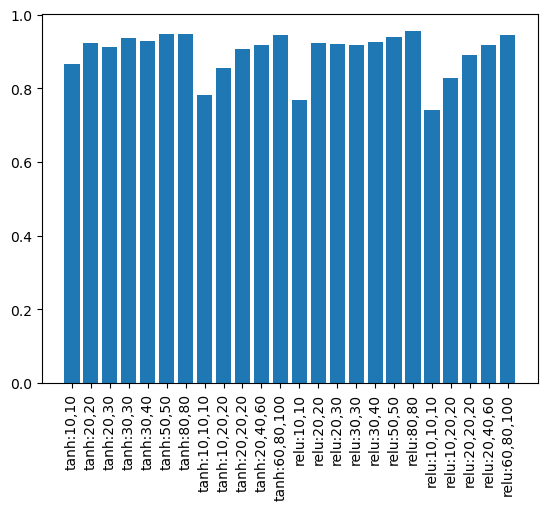

In [14]:
# Make barplot to visualise results
fig, ax = plt.subplots()

ax.bar(df['config'], df['Accuracy'])
plt.xticks(rotation=90)

plt.show()

In [15]:
# Select the best model
best_clf = clf.best_estimator_
y_pred = best_clf.predict(X_test)
best_clf.score(X_test, y_test)

0.9611111111111111

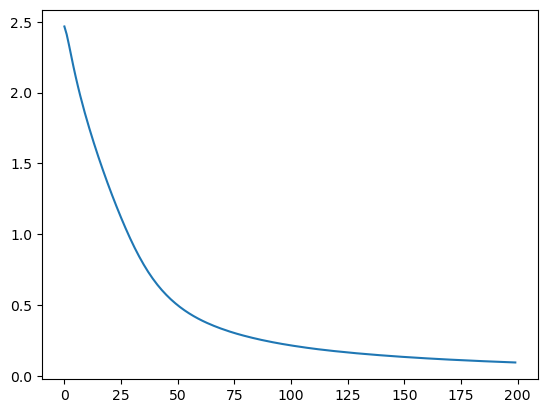

In [16]:
# We can also plot the loss of the best model
loss = best_clf.loss_curve_
plt.plot(loss)

0.837037037037037


/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


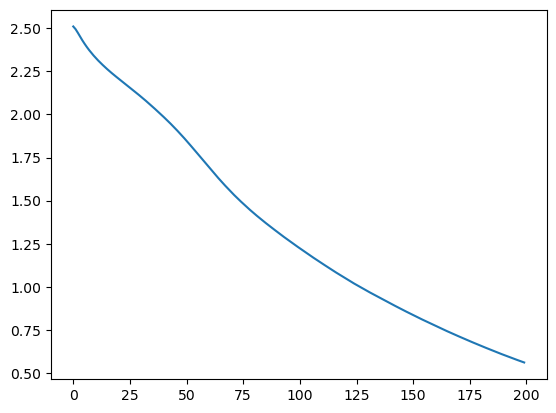

In [17]:
# Lets compare to the worst parameters
worst_clf = MLPClassifier(solver='sgd', activation='relu', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state=1)
worst_clf.fit(X_train, y_train)
y_pred = worst_clf.predict(X_test)
print(worst_clf.score(X_test, y_test))

loss = worst_clf.loss_curve_
plt.plot(loss)